In [ ]:
print("Om Namo Kal Krishna Bhagavan!")

Om Namo Kal Krishna Bhagavan!


In [ ]:
print("Jagan Matha Jagath Janani Sree Seetha Mahalaxmi Matha Ye Namo Namaha!")

Jagan Matha Jagath Janani Sree Seetha Mahalaxmi Matha Ye Namo Namaha!


##Building the Circuit for Quantum Teleportation

Let’s say we want to teleport a quantum state
∣
𝜓
⟩
∣ψ⟩ from Alice to Bob. The quantum teleportation protocol can be summarized as follows:

- **Entanglement Setup**:
Alice and Bob begin by creating an entangled Bell pair between their two qubits. This is done using a Hadamard gate followed by a CNOT gate, as shown in the "Hello World" video.

- **Interaction with the State:**
Alice then applies a series of quantum operations involving the qubit that holds the state
∣
𝜓
⟩
∣ψ⟩ and her half of the entangled pair.

- **Measurement and Communication:**
Alice measures both of her qubits—the one with the original state and her half of the Bell pair. She then sends the classical results of these measurements to Bob.

- **Bob’s Correction:**
Based on the information received from Alice, Bob applies one or more quantum gates to his qubit (his half of the entangled pair).

And just like that, the quantum state
∣
𝜓
⟩
∣ψ⟩ has been successfully teleported to Bob’s qubit!




---


Note on Implementation:

In the version we are building here, Bob will apply his correction gates conditioned on classical results of Alice’s measurements, instead of using the her qubits directly. There’s a subtle but important difference between these two approaches:

Using Alice’s qubits (before measurement) as controls for Bob’s gates is easier to implement in a quantum simulator or small-scale device.

Using the classical outcomes of Alice’s measurement as the basis for Bob’s gates enables true quantum teleportation over long distances, as it removes the need for physical quantum entanglement between Alice and Bob during the correction stage.



In [ ]:
#install the qiskit
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.3 MB/s eta 0:00:00


In [ ]:
#installation of qiskit[visulization] to plot the quantum states effectively
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5d23d12354e843884be1c8b9a6c32cd6b41af9d718c56b35bee665024c69a061
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
#install the qiskit-aer module for using different types of backend
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.0 MB/s eta 0:00:00


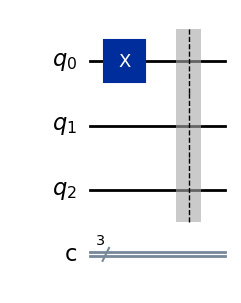

In [ ]:
#import the QuantumCircuit

from qiskit import QuantumCircuit

#Create a quantum circuit with 3 qubits and 3 classical bits with an order as follows:
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

qc = QuantumCircuit(3,3)

#Now prepare the quantum information that need to be transported
qc.x(0)
qc.barrier() # for visual aid

qc.draw("mpl")

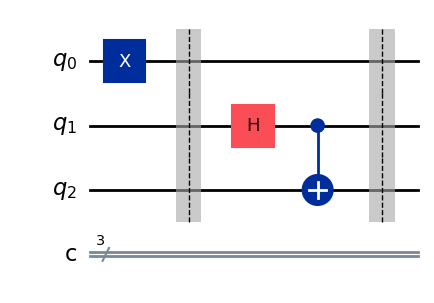

In [ ]:
#now create a entagled bell pair between the Alice and Bob ( q1 and q2 qubit)
qc.h(1)
qc.cx(1,2)
qc.barrier()

qc.draw("mpl")

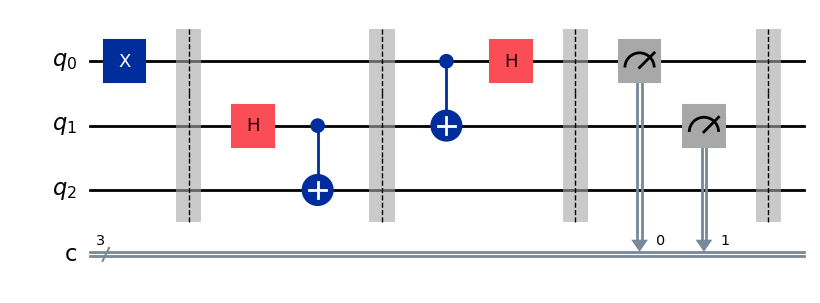

In [ ]:
#now Alice applies the set of quantum operations between the state to be teleport and her half of the bell pair
qc.cx(0,1)
qc.h(0)
qc.barrier()
#Now Alice will measure the states..
c=qc.measure([0,1],[0,1])
qc.barrier()

qc.draw("mpl")

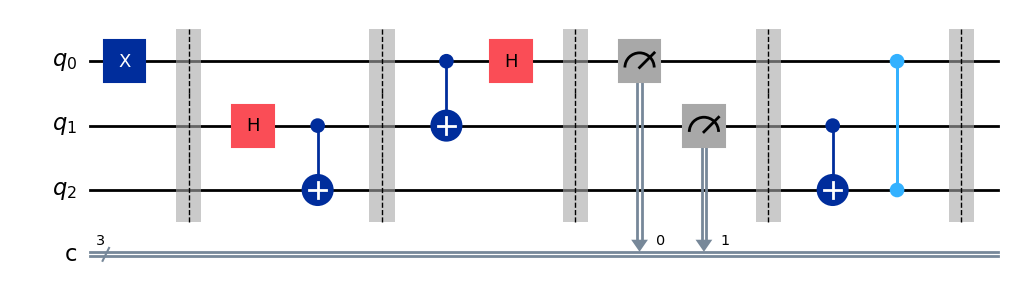

In [ ]:
#Now the quantum bit q0 and q1 are collapsed to the classical states. Bob will use these classical bits as his control
#and applies his quantum operations to recreate the collapse state at his end

qc.cx(1,2)
qc.cz(0,2)
qc.barrier()

qc.draw("mpl")

In [ ]:
qc.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░          ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■──░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │  ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼──░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │  ░ 
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■──░─
           ░      └───┘ ░            ░  ║  ║  ░ └───┘    ░ 
c: 3/═══════════════════════════════════╩══╩═══════════════
                                        0  1

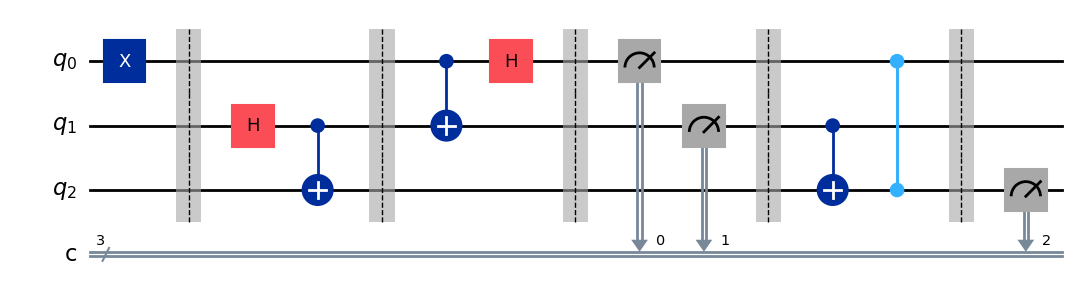

In [ ]:
#All done. The quantum state is teleported from Alice end to Bob end safely. Now Bob will measure the qubit to the get the output
qc.measure(2,2)

qc.draw("mpl")

##Run the Quantum Teleportation Circuit

Now we have successfully created the quantum circuit for quantum teleportation. All we need to do is to run this circuit and see the outputs.

Lets use the qsam simulator(measurement simulator) from Aer's simulators.

In [ ]:
#import the Aer from qiskit_aer
from qiskit_aer import Aer
from qiskit import transpile

#transpile the circuit qc by using qsam_simulator as backend and get the result
backend = Aer.get_backend("qasm_simulator")
compile = transpile(qc,backend=backend)
result=backend.run(compile,shots=1024).result()

counts= result.get_counts()
print(counts)

{'110': 243, '111': 278, '101': 243, '100': 260}


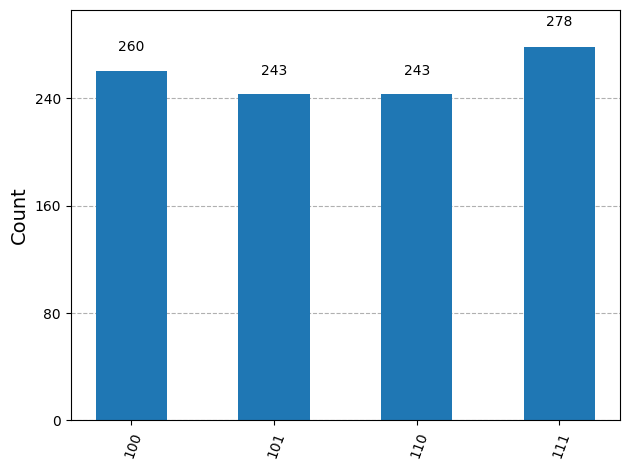

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

sv = Statevector.from_instruction(qc)
plot_bloch_multivector(sv)

QiskitError: 'Cannot apply instruction with classical bits: measure'

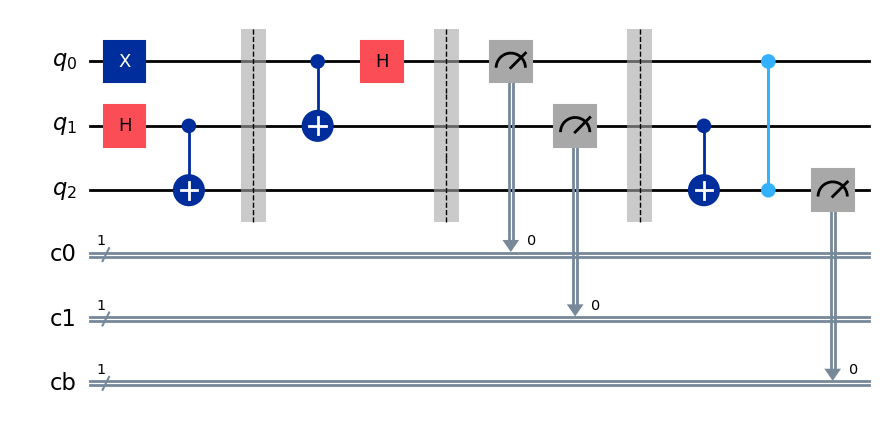

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Setup registers
q = QuantumRegister(3, "q")        # Qubits: [0] = |ψ⟩, [1] = Alice, [2] = Bob
c_0 = ClassicalRegister(1, "c0")   # For measuring qubit 0 (Alice)
c_1 = ClassicalRegister(1, "c1")   # For measuring qubit 1 (Alice)
c_bob = ClassicalRegister(1, "cb") # For measuring Bob's qubit
qc = QuantumCircuit(q, c_0, c_1, c_bob)

# Step 2: Prepare the state to teleport (say |ψ⟩ = |1⟩)
qc.x(q[0])  # Teleport |1⟩

# Step 3: Create entangled pair between qubit 1 and 2 (Alice and Bob)
qc.h(q[1])
qc.cx(q[1], q[2])

qc.barrier()

# Step 4: Alice interacts with the state
qc.cx(q[0], q[1])
qc.h(q[0])

qc.barrier()

# Step 5: Measure Alice's qubits into classical bits
qc.measure(q[0], c_0)  # q[0] → c0[0]
qc.measure(q[1], c_1)  # q[1] → c1[0]

qc.barrier()

# Step 6: Bob's conditional corrections using `if_test()`

qc.cx(q[1],q[2])
qc.cz(q[0],q[2])

# Step 7: Measure Bob's qubit
qc.measure(q[2], c_bob[0])

# Draw circuit (optional)
qc.draw("mpl")


{'1 1 1': 244, '1 0 1': 285, '1 1 0': 240, '1 0 0': 255}


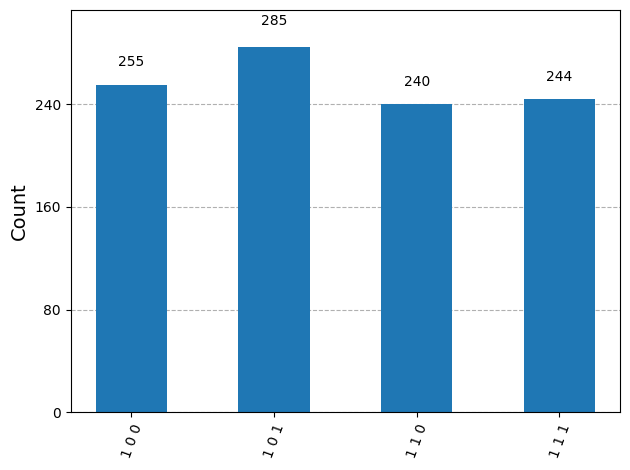

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)


##Creating the Quantum Teleportation circuits by using the sub circuits

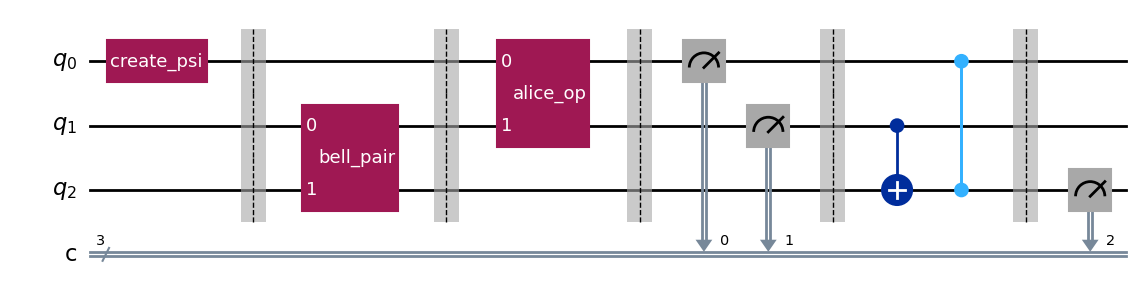

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Gate
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector



# Subcircuit: State preparation |ψ⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩
def create_state_psi(theta):
    qc = QuantumCircuit(1, name='create_psi')
    qc.ry(theta, 0)
    return qc.to_gate()

# Subcircuit: Create Bell pair on qubits 1 and 2
def create_bell_pair():
    qc = QuantumCircuit(2, name='bell_pair')
    qc.h(0)
    qc.cx(0, 1)
    return qc.to_gate()

# Subcircuit: Alice’s operation (CNOT + H)
def alice_operation():
    qc = QuantumCircuit(2, name='alice_op')
    qc.cx(0, 1)
    qc.h(0)
    return qc.to_gate()

# Build main teleportation circuit
def build_teleport_circuit(theta):
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Step 1: Prepare state |ψ⟩ in qubit 0
    qc.append(create_state_psi(theta), [qr[0]])
    qc.barrier()

    # Step 2: Create Bell pair between qubit 1 and 2
    qc.append(create_bell_pair(), [qr[1], qr[2]])
    qc.barrier()

    # Step 3: Alice’s quantum operations
    qc.append(alice_operation(), [qr[0], qr[1]])
    qc.barrier()

    # Step 4: Alice’s measurement
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.barrier()

    # Step 5: Bob’s conditional operations (no subcircuit)

    qc.cx(qr[1], qr[2])

    qc.cz(qr[0], qr[2])
    qc.barrier()

    # final_state = Statevector(qc)
    # final_state.draw()
    # Final: Bob’s measurement
    qc.measure(qr[2], cr[2])

    return qc


qc = build_teleport_circuit(0.01)
qc.draw("mpl")

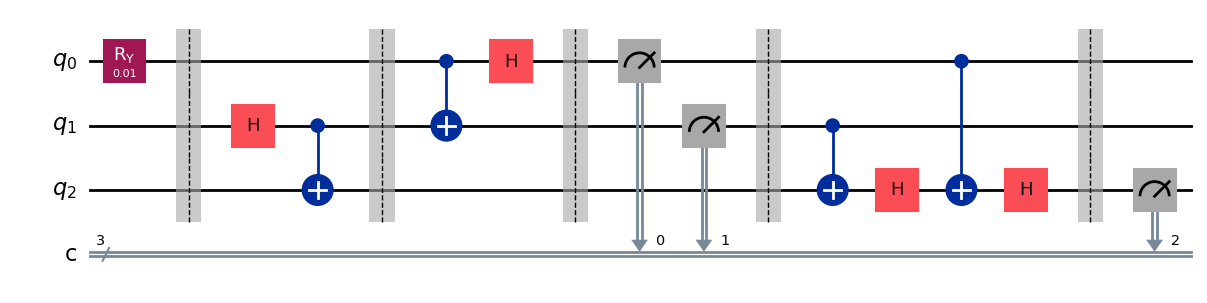

In [ ]:
qc.decompose().draw("mpl")

##Running the circuit with  backend

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

In [ ]:
print(counts)

{'001': 249, '011': 253, '000': 255, '010': 267}


##Iterating over seferal intial angles by using a iterative loop


###Circuit without modulation (subcircuits)

In [ ]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.controlflow import IfElseOp

def create_state_psi(theta):
    qc = QuantumCircuit(1, name='state psi')
    qc.ry(theta, 0)
    return qc

def build_teleport_circuit(theta):
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    # Step 1: Prepare state to teleport
    qc.append(create_state_psi(theta).to_instruction(), [qr[0]])

    # Step 2: Create Bell pair
    qc.h(qr[1])
    qc.cx(qr[1], qr[2])

    # Step 3: Alice's operations
    qc.cx(qr[0], qr[1])
    qc.h(qr[0])
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])

    # Step 4: Bob’s correction using new control flow syntax

    qc.cx(qr[1], qr[2])
    qc.cz(qr[0], qr[2])

    # Final: Measure Bob's qubit
    qc.measure(qr[2], cr[2])

    return qc


In [ ]:
simulator = Aer.get_backend("aer_simulator")
thetas = np.arange(0, 4*np.pi, np.pi/16)
percent_ones = []

for theta in thetas:
    qc = build_teleport_circuit(theta)
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()
    ones = sum(count for key, count in counts.items() if key[0] == '1')  # key[0] = c2 = Bob
    percent_ones.append(100 * ones / 1024)


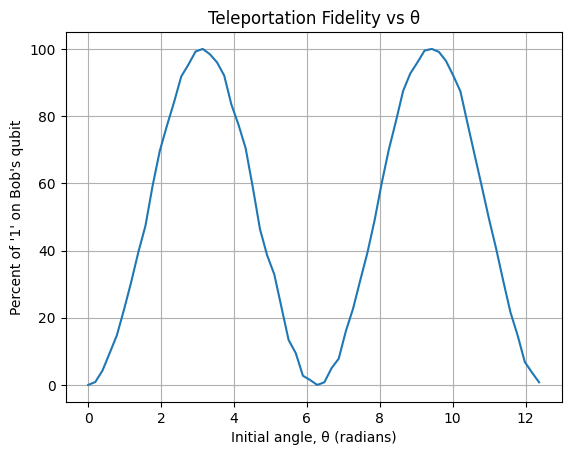

In [ ]:
plt.plot(thetas, percent_ones)
plt.xlabel("Initial angle, θ (radians)")
plt.ylabel("Percent of '1' on Bob's qubit")
plt.title("Teleportation Fidelity vs θ")
plt.grid(True)
plt.show()


###Circuit with modulation ( sub circuits)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Gate
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Subcircuit: State preparation |ψ⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩
def create_state_psi(theta):
    qc = QuantumCircuit(1, name='create_psi')
    qc.ry(theta, 0)
    return qc.to_gate()

# Subcircuit: Create Bell pair on qubits 1 and 2
def create_bell_pair():
    qc = QuantumCircuit(2, name='bell_pair')
    qc.h(0)
    qc.cx(0, 1)
    return qc.to_gate()

# Subcircuit: Alice’s operation (CNOT + H)
def alice_operation():
    qc = QuantumCircuit(2, name='alice_op')
    qc.cx(0, 1)
    qc.h(0)
    return qc.to_gate()

# Build main teleportation circuit
def build_teleport_circuit(theta):
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Step 1: Prepare state |ψ⟩ in qubit 0
    qc.append(create_state_psi(theta), [qr[0]])
    qc.barrier()

    # Step 2: Create Bell pair between qubit 1 and 2
    qc.append(create_bell_pair(), [qr[1], qr[2]])
    qc.barrier()

    # Step 3: Alice’s quantum operations
    qc.append(alice_operation(), [qr[0], qr[1]])
    qc.barrier()

    # Step 4: Alice’s measurement
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.barrier()

    # Step 5: Bob’s conditional operations (no subcircuit)

    qc.cx(qr[1], qr[2])
    with qc.if_test((cr[0], 1)):
        qc.cz(qr[0], qr[2])
    qc.barrier()

    # Final: Bob’s measurement
    qc.measure(qr[2], cr[2])

    return qc


In [ ]:
simulator = AerSimulator()
thetas = np.arange(0, 4*np.pi, np.pi/16)
percent_ones = []

for theta in thetas:
    qc = build_teleport_circuit(theta)
    compiled = transpile(qc, simulator)  # no need to transpile for AerSimulator unless targeting backend-specific
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()

    # Bob’s classical bit is c2 → leftmost bit in bitstring
    ones = sum(c for k, c in counts.items() if k[0] == '1')
    percent_ones.append(100 * ones / 1024)


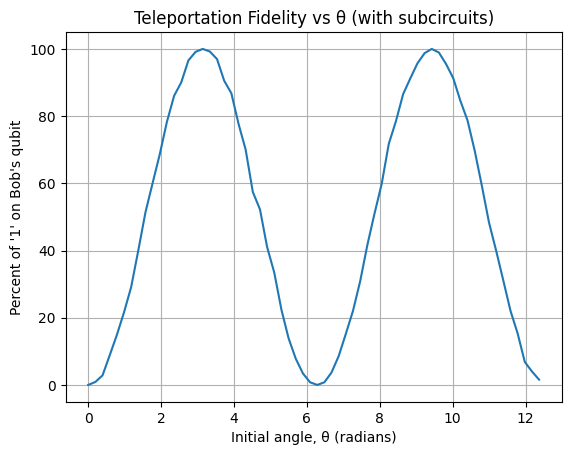

In [ ]:
plt.plot(thetas, percent_ones)
plt.xlabel("Initial angle, θ (radians)")
plt.ylabel("Percent of '1' on Bob's qubit")
plt.title("Teleportation Fidelity vs θ (with subcircuits)")
plt.grid(True)
plt.show()


##Quantum Teleportation over long distances

Till now we have implemented the teleportation by using the Alice qubits directly conditioned on bob's operations instead of classical bits measured by the Alice. This is the simplest way of executing the Quantum Teleportation without much effect. But this works for shot distances only. To make it range more wider we need to use the classical bits that were measured by the Alice as the conditionals to perform the operations on the Bob's end. To do this we can use the conditional flows in Qiskit like **`c_if()`**. But fortuantinately this was removed in newer version of the qiskit `(2.1)` and now we need to use the` with if_test()` as conditional flows. This is process of implementing the Quantum Teleportation by using the Alice's classical bits as conditionals on Bob's operation is known as **Quantum Teleportation over long distances**.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# from qiskit.circuit import Gate
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.controlflow import IfElseOp
from qiskit.quantum_info import Statevector
from qiskit import transpile

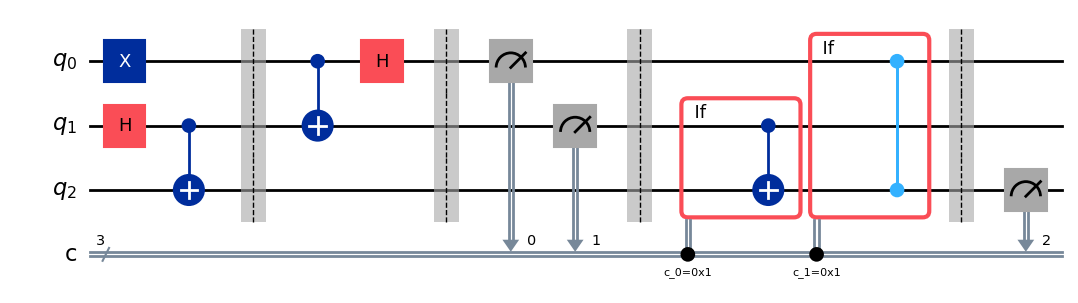

In [ ]:
qc = QuantumCircuit(3,3)

#now create a state to teleport
qc.x(0) #|1>

#now create the bell state over the q1 and q2 qubits
qc.h(1)
qc.cx(1,2)
qc.barrier()

#now do the operations at the Alice end
qc.cx(0,1)
qc.h(0)
qc.barrier()
#now do the measurement at the alice end
qc.measure([0,1],[0,1])
qc.barrier()
#now do the operation at the Bob's end
with qc.if_test((qc.clbits[0],1)):
    qc.cx(1,2)
with qc.if_test((qc.clbits[1],1)):
    qc.cz(0,2)
qc.barrier()
#now do the measurement at the Bob's end
qc.measure(2,2)
qc.draw("mpl")


In [ ]:
#Building the circuit is completed. Now lets run this circuit in the backend (Aer Simulator) we can't use the Qasm Simulator as there are
#compplex control statements. And one can't run this circuit in the real Quantum Hardware as there are the Complex control statements.
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled,shots=1024).result()

counts = result.get_counts()

print(counts)

{'010': 292, '100': 242, '111': 247, '101': 243}


## Iterating over several intial angles

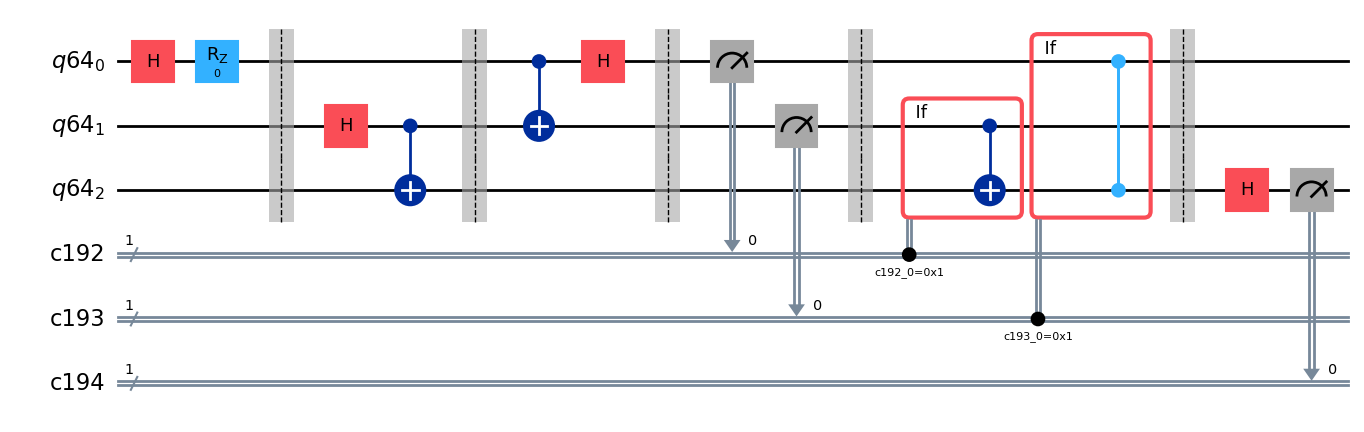

In [ ]:
thetas = np.arange(0,4*np.pi,np.pi/16)
circuits_classical_controls = []

for theta in thetas:
  qr = QuantumRegister(3)
  cr1 = ClassicalRegister(1)
  cr2 = ClassicalRegister(1)
  cr3 = ClassicalRegister(1)
  qc = QuantumCircuit(qr,cr1,cr2,cr3)

  #Create state to teleport
  qc.h(0)
  qc.rz(theta,0)
  qc.barrier()
  #Create a bell state between the alice qubit(q1) and bob's qubit(q2)
  qc.h(1)
  qc.cx(1,2)
  qc.barrier()
  #Now apply the alice operations on qubit 0 and 1
  qc.cx(0,1)
  qc.h(0)
  qc.barrier()
  #Alice measure her both qubits
  qc.measure([0,1],[0,1])
  qc.barrier()

  #now apply the bob's conditional operations based on the classical bits(c1,c2) send by the Alice
  with qc.if_test((qc.clbits[0],1)):
    qc.cx(1,2)

  with qc.if_test((qc.clbits[1],1)):
    qc.cz(0,2)

  qc.barrier()

  #measure the bob's qubit in hadamrad basis to find out in which state it is in
  qc.h(2)
  qc.measure(2,2)
  circuits_classical_controls.append(qc)

circuits_classical_controls[0].draw("mpl")

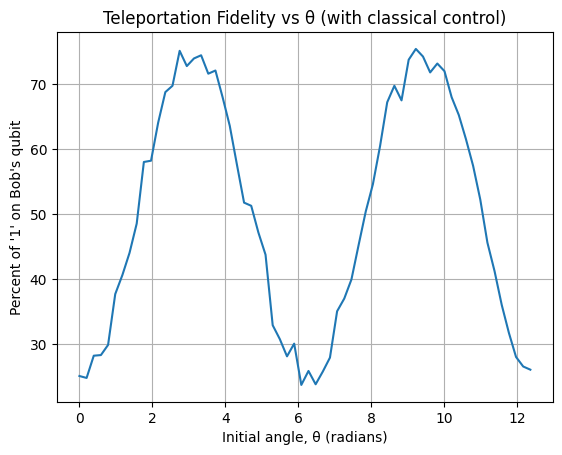

In [ ]:
#Run the circuit with AerSimulator as backend
simulator = AerSimulator()
percent_ones = []
for circuit in circuits_classical_controls:
  compiled = transpile(circuit, simulator)
  result = simulator.run(compiled, shots = 1024).result()

  counts = result.get_counts()
  c2_ones = sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[0] == '1')
  percent_ones.append(100.*c2_ones/1024)

plt.plot(thetas, percent_ones)
plt.xlabel("Initial angle, θ (radians)")
plt.ylabel("Percent of '1' on Bob's qubit")
plt.title("Teleportation Fidelity vs θ (with classical control)")
plt.grid(True)
plt.show()
